<a href="https://colab.research.google.com/github/cloverbunny/mimic-iv/blob/master/c17_cleaningdata_4_20_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# setup

In [1]:
# Import libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import seaborn as sns

# Make pandas dataframes prettier
from IPython.display import display, HTML
pd.set_option("display.max_columns", None)

# mount google drive to save files separately
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/

/content/drive/My Drive


# cleaning

In [6]:
pt12 = pd.read_csv("MIMIC/micu_vent_sofa_dialysis_abg_vs_ecmo_rass_rawgcs4-20-22.csv")

In [7]:
len(pt12.stay_id.unique()), len(pt12.stay_id.unique()), 

(1284, 1284)

In [8]:
pt12

,Unnamed: 0,Unnamed: 0.1,stay_id,hadm_id,subject_id_x,intime,outtime,los,day,day_number,vent_yn,pf_novent,pf_vent,max_epi,max_norepi,min_map,min_gcs,min_uop,max_bili,max_cr,min_plt,max_sofa,dialysis_yn,avg_fio2,avg_peep,avg_rr,avg_tv,avg_mv,avg_platpress,min_hr,max_hr,min_rr,max_rr,min_temp,max_temp,min_spo2,avg_ph,avg_pco2,ecmo_yn,median_rass,min_verbal,min_motor,min_eye
0,0,0,30061692,22637281,10645926,2192-03-18 04:51:00,2192-03-21 13:55:12,3.377917,2192-03-18,1,1,NaN,62.000000,NaN,0.200002,55.0,15.0,NaN,0.2,2.3,284.0,10.0,NaN,54.0,9.54,17.0,446.0,9.72,24.0,86.0,124.0,19.0,26.0,37.30,38.20,82.0,7.320000,41.500000,NaN,-3.0,1.0,1.0,2.0
1,1,1,30061692,22637281,10645926,2192-03-18 04:51:00,2192-03-21 13:55:12,3.377917,2192-03-19,2,1,NaN,252.500000,NaN,0.029934,61.0,15.0,1606.779661,0.5,1.3,192.0,10.0,NaN,50.0,10.30,20.0,480.0,9.30,23.0,78.0,104.0,12.0,27.0,36.72,37.44,95.0,7.373333,37.666667,NaN,-1.0,1.0,5.0,2.0
2,2,2,30061692,22637281,10645926,2192-03-18 04:51:00,2192-03-21 13:55:12,3.377917,2192-03-20,3,0,NaN,NaN,NaN,NaN,64.0,10.0,1630.000000,NaN,1.0,121.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,99.0,12.0,30.0,36.28,37.50,94.0,NaN,NaN,NaN,NaN,1.0,5.0,3.0
3,3,3,30061692,22637281,10645926,2192-03-18 04:51:00,2192-03-21 13:55:12,3.377917,2192-03-21,4,0,NaN,NaN,NaN,NaN,74.0,13.0,3396.923077,NaN,0.9,134.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,95.0,14.0,33.0,36.22,37.94,92.0,NaN,NaN,NaN,NaN,4.0,6.0,3.0
4,4,4,30117582,25682203,17768973,2192-07-02 02:48:54,2192-07-14 12:33:50,12.406204,2192-07-02,1,1,157.0,117.142857,NaN,0.251120,57.0,15.0,NaN,1.0,6.1,150.0,11.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,95.0,18.0,31.0,36.56,37.72,89.0,7.272000,47.200000,NaN,-4.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15672,15672,15672,39918058,23914765,15689523,2159-06-25 16:26:17,2159-07-24 20:49:26,29.182743,2159-07-20,26,0,NaN,NaN,NaN,0.077368,54.0,15.0,NaN,NaN,2.7,80.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,79.0,120.0,11.0,29.0,36.83,37.44,92.0,NaN,NaN,NaN,0.0,5.0,6.0,4.0
15673,15673,15673,39918058,23914765,15689523,2159-06-25 16:26:17,2159-07-24 20:49:26,29.182743,2159-07-21,27,0,NaN,NaN,NaN,0.069556,56.0,15.0,NaN,NaN,3.1,83.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,121.0,12.0,29.0,36.56,37.17,92.0,NaN,NaN,NaN,0.5,5.0,6.0,4.0
15674,15674,15674,39918058,23914765,15689523,2159-06-25 16:26:17,2159-07-24 20:49:26,29.182743,2159-07-22,28,0,NaN,NaN,NaN,NaN,63.0,12.0,NaN,NaN,2.6,74.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,107.0,11.0,25.0,36.56,36.94,93.0,NaN,NaN,NaN,0.0,1.0,4.0,4.0
15675,15675,15675,39918058,23914765,15689523,2159-06-25 16:26:17,2159-07-24 20:49:26,29.182743,2159-07-23,29,0,NaN,NaN,NaN,NaN,29.0,15.0,NaN,NaN,2.9,81.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,102.0,14.0,26.0,36.78,37.00,93.0,NaN,NaN,NaN,0.0,1.0,6.0,3.0


In [9]:
pt12 = pt12.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [ ]:
# merge pf vent/nonvent  columns

# check for outliers 

# fill in 0 for NA max norepi as if not documented was likely 0
# impute 0 for NA dialysis values as table only takes those with dialysis (confirmed dialysis table only takes those with some kind of dialysis present)
# impute 0 for NA ecmo days as only pulled days with ECMO documentation 

#normalize 0-1
#cluster 

In [10]:
pt12 = pt12.drop(columns=['max_epi', 'hadm_id', 'subject_id_x'])# drop max_epi column as rarely used

In [ ]:
#pt10 = pt10.drop(columns=['vent_yn'])

In [11]:
pt12['pf_ratio'] = pt12[['pf_novent','pf_vent']].mean(axis=1)

In [13]:
pt12 = pt12.drop(columns=['pf_novent','pf_vent'])

In [14]:
pt12.columns

Index(['stay_id', 'intime', 'outtime', 'los', 'day', 'day_number', 'vent_yn',
       'max_norepi', 'min_map', 'min_gcs', 'min_uop', 'max_bili', 'max_cr',
       'min_plt', 'max_sofa', 'dialysis_yn', 'avg_fio2', 'avg_peep', 'avg_rr',
       'avg_tv', 'avg_mv', 'avg_platpress', 'min_hr', 'max_hr', 'min_rr',
       'max_rr', 'min_temp', 'max_temp', 'min_spo2', 'avg_ph', 'avg_pco2',
       'ecmo_yn', 'median_rass', 'min_verbal', 'min_motor', 'min_eye',
       'pf_ratio'],
      dtype='object')

In [15]:
pt12.dtypes

stay_id            int64
intime            object
outtime           object
los              float64
day               object
day_number         int64
vent_yn            int64
max_norepi       float64
min_map          float64
min_gcs          float64
min_uop          float64
max_bili         float64
max_cr           float64
min_plt          float64
max_sofa         float64
dialysis_yn      float64
avg_fio2         float64
avg_peep         float64
avg_rr           float64
avg_tv           float64
avg_mv           float64
avg_platpress    float64
min_hr           float64
max_hr           float64
min_rr           float64
max_rr           float64
min_temp         float64
max_temp         float64
min_spo2         float64
avg_ph           float64
avg_pco2         float64
ecmo_yn          float64
median_rass      float64
min_verbal       float64
min_motor        float64
min_eye          float64
pf_ratio         float64
dtype: object

In [16]:
pt12['max_norepi']=pt12['max_norepi'].fillna(0)
pt12['ecmo_yn']=pt12['ecmo_yn'].fillna(0)
pt12['dialysis_yn']=pt12['dialysis_yn'].fillna(0)

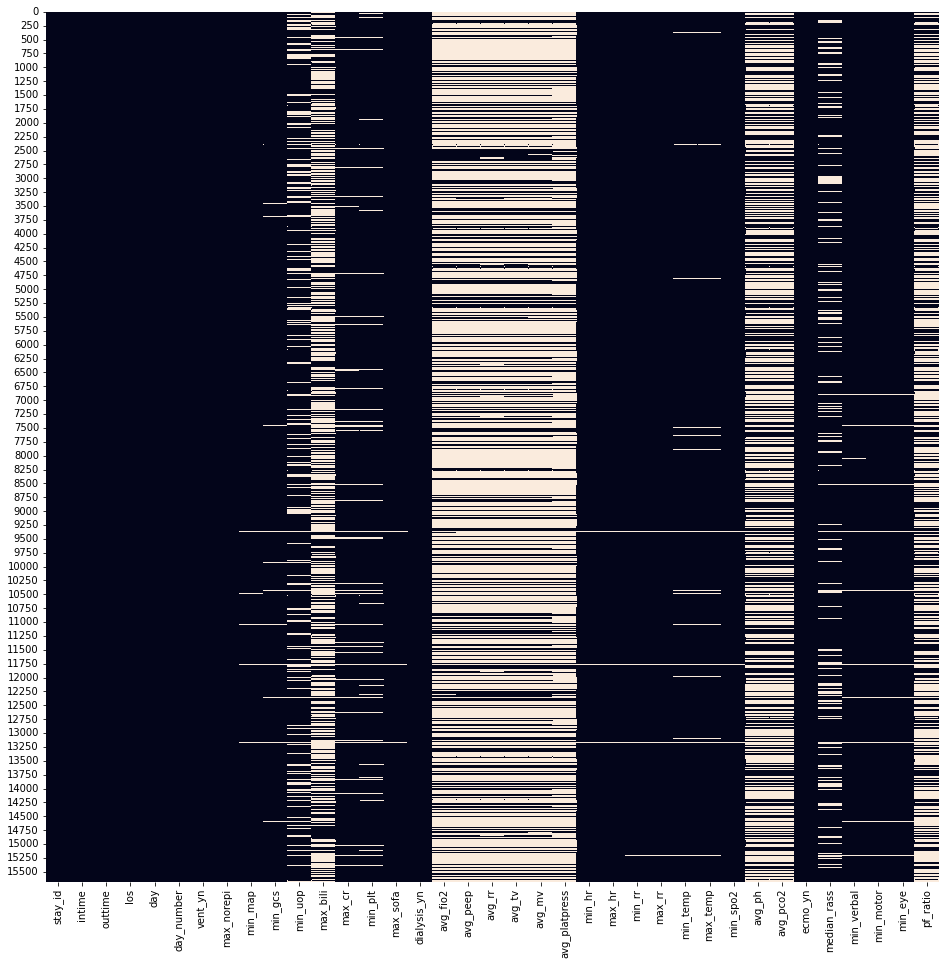

In [17]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(
    pt12.isna(),
    cbar=False,
    yticklabels=250,
)

In [18]:
columns_to_curate = [
    'max_norepi', 'min_map', 'min_gcs', 'min_uop', 'max_bili', 'max_cr',
       'min_plt', 'max_sofa', 'dialysis_yn', 'avg_fio2', 'avg_peep', 'avg_rr',
       'avg_tv', 'avg_mv', 'avg_platpress', 'min_hr', 'max_hr', 'min_rr',
       'max_rr', 'min_temp', 'max_temp', 'min_spo2', 'avg_ph', 'avg_pco2',
       'ecmo_yn', 'pf_ratio', 'median_rass', 'min_verbal', 'min_eye','min_motor'
]

In [19]:
data = pt12

In [20]:
data.to_csv("MIMIC/data4-20-22.csv")

# examine ranges

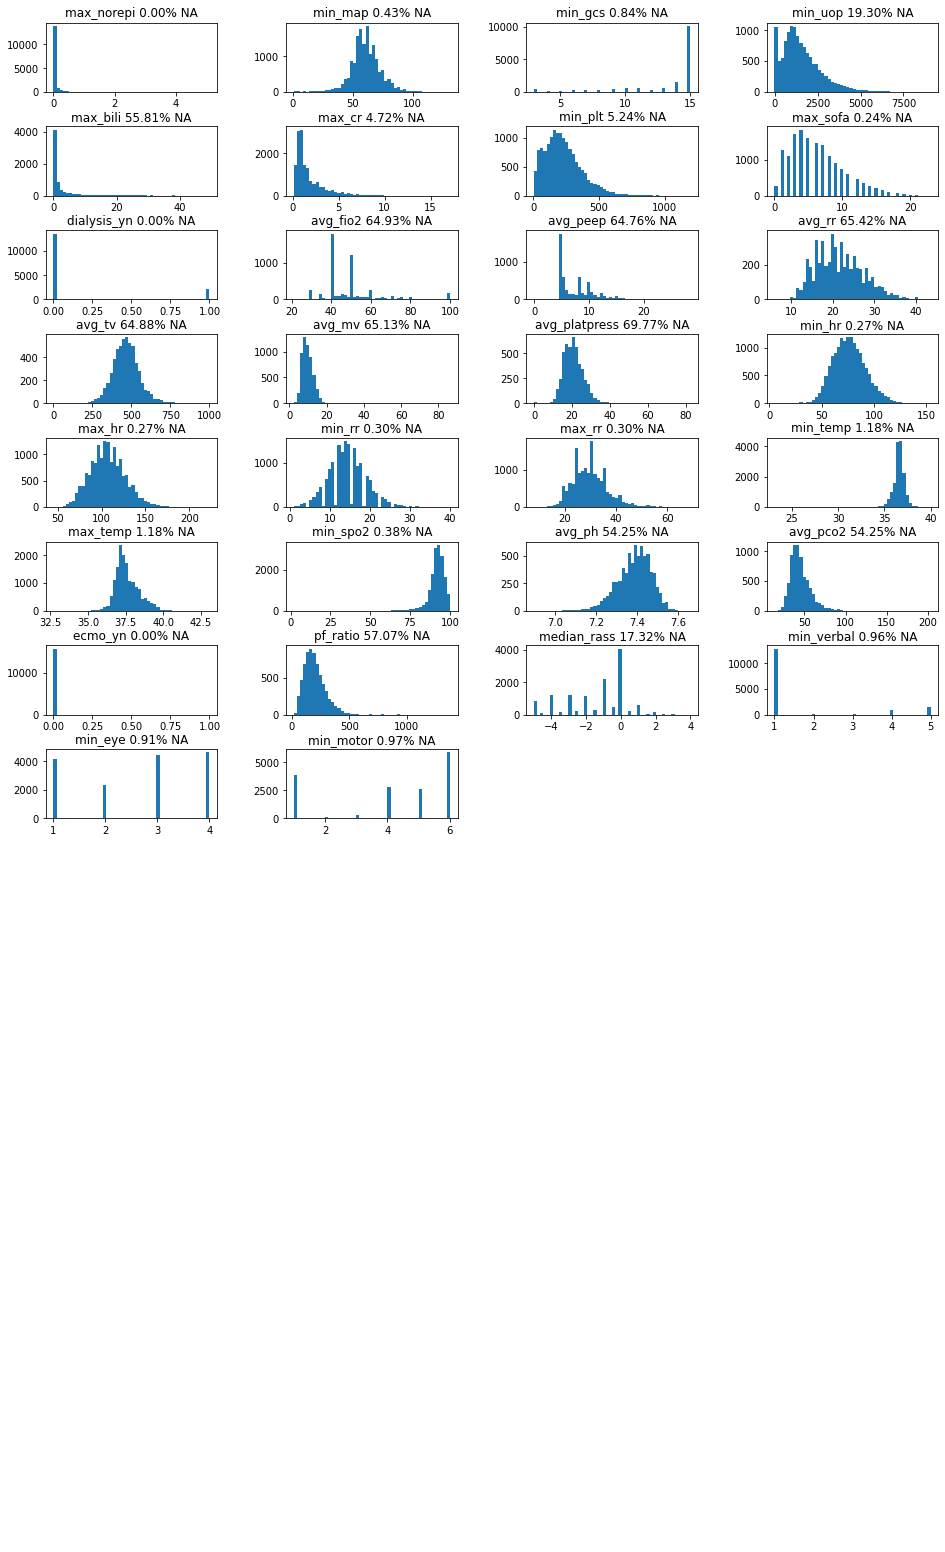

In [21]:
columns = np.array(columns_to_curate)
cols = np.pad(columns, (0, 60 - columns.size), constant_values=np.nan).reshape(15, 4)
fig, axes = plt.subplots(
    nrows=cols.shape[0], 
    ncols=cols.shape[1], 
    figsize=(16, 28), 
    gridspec_kw={"wspace": 0.4, "hspace": 0.5}
)
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        column = cols[row, col]
        ax = axes[row, col]
        if isinstance(column, str) and column in data:
            ax.hist(
                data[column], 
                bins=50,
#                 log=True
            )
            ax.set_title(column + f" {data[column].isna().sum() * 100 / data.shape[0]:.2f}% NA")
        else:
            ax.tick_params(
                axis='both', which='both',
                bottom=None, top=None,
                labelbottom=None,
                left=None, right=None,
                labelleft=None
            )
            for i in ["top", "left", "right", "bottom"]:
                ax.spines[i].set_visible(False)

In [22]:
(data[columns_to_curate].isna().sum() / data.shape[0] * 100).apply(lambda x: f"{x:.2f}") + "%"


max_norepi        0.00%
min_map           0.43%
min_gcs           0.84%
min_uop          19.30%
max_bili         55.81%
max_cr            4.72%
min_plt           5.24%
max_sofa          0.24%
dialysis_yn       0.00%
avg_fio2         64.93%
avg_peep         64.76%
avg_rr           65.42%
avg_tv           64.88%
avg_mv           65.13%
avg_platpress    69.77%
min_hr            0.27%
max_hr            0.27%
min_rr            0.30%
max_rr            0.30%
min_temp          1.18%
max_temp          1.18%
min_spo2          0.38%
avg_ph           54.25%
avg_pco2         54.25%
ecmo_yn           0.00%
pf_ratio         57.07%
median_rass      17.32%
min_verbal        0.96%
min_eye           0.91%
min_motor         0.97%
dtype: object

#try winsorizing instead of range

In [23]:
from scipy.stats.mstats import winsorize

In [24]:
data.describe()

,stay_id,los,day_number,vent_yn,max_norepi,min_map,min_gcs,min_uop,max_bili,max_cr,min_plt,max_sofa,dialysis_yn,avg_fio2,avg_peep,avg_rr,avg_tv,avg_mv,avg_platpress,min_hr,max_hr,min_rr,max_rr,min_temp,max_temp,min_spo2,avg_ph,avg_pco2,ecmo_yn,median_rass,min_verbal,min_motor,min_eye,pf_ratio
count,1.567700e+04,15677.000000,15677.000000,15677.000000,15677.000000,15609.000000,15546.000000,12651.000000,6928.000000,14937.000000,14856.000000,15639.000000,15677.000000,5498.000000,5524.000000,5421.000000,5505.000000,5466.000000,4739.000000,15634.000000,15634.000000,15630.000000,15630.000000,15492.000000,15492.000000,15617.000000,7172.000000,7172.000000,15677.000000,12961.000000,15527.000000,15525.000000,15535.000000,6730.000000
mean,3.498955e+07,19.800061,10.649295,0.240097,0.040684,60.906849,13.408915,1549.054558,3.187500,1.772525,227.802571,6.202315,0.133763,49.714000,7.991689,21.670039,464.163985,9.703902,20.856171,76.552450,107.045606,14.517118,29.946385,36.588599,37.580108,91.989947,7.387399,45.266115,0.000765,-1.402824,1.598055,4.144541,2.613968,201.098539
std,2.910584e+06,14.901424,10.407596,0.427156,0.125427,12.409457,3.010003,1136.704356,6.207558,1.711208,142.630222,3.942400,0.340408,15.164286,3.665394,5.643304,85.941438,3.006207,5.295514,15.755747,20.224282,4.659829,7.054467,0.619370,0.785602,6.155960,0.083204,12.438992,0.027657,1.751165,1.340624,1.985156,1.166514,96.762574
min,3.000402e+07,0.237870,1.000000,0.000000,0.000000,1.000000,3.000000,-17.280000,0.100000,0.100000,5.000000,0.000000,0.000000,21.000000,0.000000,6.000000,0.000000,2.300000,0.000000,5.000000,45.000000,1.000000,8.000000,23.100000,32.700000,2.000000,6.900000,14.000000,0.000000,-5.000000,1.000000,1.000000,1.000000,18.000000
25%,3.237979e+07,9.730324,4.000000,0.000000,0.000000,54.000000,14.000000,762.736674,0.400000,0.700000,125.000000,3.000000,0.000000,40.000000,5.000000,17.333333,409.666667,7.566667,17.000000,65.000000,93.000000,11.500000,25.000000,36.330000,37.060000,90.000000,7.340000,37.000000,0.000000,-3.000000,1.000000,2.000000,1.000000,135.000000
50%,3.507908e+07,16.053877,8.000000,0.000000,0.000000,60.000000,15.000000,1320.000000,0.700000,1.100000,206.000000,6.000000,0.000000,47.142857,6.870833,21.000000,462.500000,9.348000,20.333333,76.000000,106.000000,14.000000,29.000000,36.620000,37.440000,93.000000,7.397321,43.000000,0.000000,-1.000000,1.000000,5.000000,3.000000,186.000000
75%,3.746958e+07,25.006921,14.000000,0.000000,0.000000,68.000000,15.000000,2120.000000,2.500000,2.200000,305.000000,9.000000,0.000000,52.000000,10.000000,25.400000,514.000000,11.500000,24.000000,87.000000,120.000000,17.000000,34.000000,36.940000,38.000000,95.000000,7.446667,51.258929,0.000000,0.000000,1.000000,6.000000,4.000000,250.000000
max,3.999604e+07,88.041505,89.000000,1.000000,5.093871,131.000000,15.000000,9083.870968,49.300000,17.100000,1194.000000,23.000000,1.000000,100.000000,28.400000,43.555556,1000.000000,86.140000,82.333333,154.000000,223.000000,40.000000,69.000000,40.000000,43.060000,100.000000,7.660000,203.000000,1.000000,4.000000,5.000000,6.000000,4.000000,1373.333333


In [26]:
data.columns

Index(['stay_id', 'intime', 'outtime', 'los', 'day', 'day_number', 'vent_yn',
       'max_norepi', 'min_map', 'min_gcs', 'min_uop', 'max_bili', 'max_cr',
       'min_plt', 'max_sofa', 'dialysis_yn', 'avg_fio2', 'avg_peep', 'avg_rr',
       'avg_tv', 'avg_mv', 'avg_platpress', 'min_hr', 'max_hr', 'min_rr',
       'max_rr', 'min_temp', 'max_temp', 'min_spo2', 'avg_ph', 'avg_pco2',
       'ecmo_yn', 'median_rass', 'min_verbal', 'min_motor', 'min_eye',
       'pf_ratio'],
      dtype='object')

In [49]:
columns_numbers = [
     'max_norepi', 'min_map', 'min_uop', 'max_bili',
       'max_cr', 'min_plt', 'avg_fio2', 'avg_peep',
       'avg_rr', 'avg_tv', 'avg_mv', 'avg_platpress', 'min_hr', 'max_hr',
       'min_rr', 'max_rr', 'min_temp', 'max_temp', 'min_spo2', 'avg_ph',
       'avg_pco2', 'pf_ratio'      
]

In [50]:
winsorized = data.copy()

In [ ]:
winsorized.dtypes

In [51]:

winsorized[columns_numbers] = winsorized[columns_numbers].apply(lambda x: winsorize(x,limits=[.02,.02]))

In [52]:
winsorized.describe() #why isn't this working on all the columns? do we need to hide NAs?

,stay_id,los,day_number,vent_yn,max_norepi,min_map,min_gcs,min_uop,max_bili,max_cr,min_plt,max_sofa,dialysis_yn,avg_fio2,avg_peep,avg_rr,avg_tv,avg_mv,avg_platpress,min_hr,max_hr,min_rr,max_rr,min_temp,max_temp,min_spo2,avg_ph,avg_pco2,ecmo_yn,median_rass,min_verbal,min_motor,min_eye,pf_ratio
count,1.567700e+04,15677.000000,15677.000000,15677.000000,15677.000000,15677.000000,15546.000000,12651.000000,6928.000000,14937.000000,14856.000000,15677.000000,15677.000000,5498.000000,5524.000000,5421.000000,5505.000000,5466.000000,4739.000000,15677.000000,15677.000000,15677.000000,15677.000000,15677.000000,15677.000000,15677.000000,7172.000000,7172.000000,15677.000000,12961.000000,15677.000000,15677.000000,15677.000000,6730.000000
mean,3.498955e+07,19.800061,10.649295,0.240097,0.036885,61.129106,13.408915,1549.438842,3.188915,1.774506,227.979604,6.223895,0.133763,50.002977,8.010692,21.751519,466.700465,9.746824,20.981289,76.647254,107.081967,14.515727,29.916470,36.615805,37.608963,92.274606,7.389718,45.377732,0.000765,-1.402824,1.630605,4.162531,2.626523,201.789449
std,2.910584e+06,14.901424,10.407596,0.427156,0.089802,11.475325,3.010003,1136.186639,6.206865,1.709423,142.370616,3.957223,0.340408,14.821113,3.639606,5.512703,80.516436,2.940862,5.058746,15.269622,19.552204,4.480052,6.665938,0.564518,0.778033,4.704884,0.077140,12.270774,0.027657,1.751165,1.374684,1.983857,1.168620,95.782665
min,3.000402e+07,0.237870,1.000000,0.000000,0.000000,34.000000,3.000000,28.800000,0.200000,0.300000,25.000000,0.000000,0.000000,35.000000,5.000000,14.000000,337.666667,5.900000,14.000000,48.000000,70.000000,5.000000,18.000000,35.110000,36.280000,76.000000,7.234286,29.000000,0.000000,-5.000000,1.000000,1.000000,1.000000,75.789474
25%,3.237979e+07,9.730324,4.000000,0.000000,0.000000,54.000000,14.000000,762.736674,0.400000,0.700000,125.000000,3.000000,0.000000,40.000000,5.000000,17.333333,409.666667,7.566667,17.000000,65.000000,93.000000,11.500000,25.000000,36.330000,37.060000,90.000000,7.340000,37.000000,0.000000,-3.000000,1.000000,2.000000,1.000000,135.000000
50%,3.507908e+07,16.053877,8.000000,0.000000,0.000000,60.000000,15.000000,1320.000000,0.700000,1.100000,206.000000,6.000000,0.000000,47.142857,6.870833,21.000000,462.500000,9.348000,20.333333,76.000000,106.000000,14.000000,29.000000,36.670000,37.440000,93.000000,7.397321,43.000000,0.000000,-1.000000,1.000000,5.000000,3.000000,186.000000
75%,3.746958e+07,25.006921,14.000000,0.000000,0.000000,68.000000,15.000000,2120.000000,2.500000,2.200000,305.000000,9.000000,0.000000,52.000000,10.000000,25.400000,514.000000,11.500000,24.000000,87.000000,120.000000,17.000000,34.000000,36.940000,38.060000,95.000000,7.446667,51.258929,0.000000,0.000000,1.000000,6.000000,4.000000,250.000000
max,3.999604e+07,88.041505,89.000000,1.000000,0.411882,90.000000,15.000000,9083.870968,49.300000,17.100000,1194.000000,18.000000,1.000000,100.000000,28.400000,43.555556,1000.000000,86.140000,82.333333,113.000000,155.000000,25.000000,48.500000,38.000000,39.610000,100.000000,7.660000,203.000000,1.000000,4.000000,5.000000,6.000000,4.000000,1373.333333


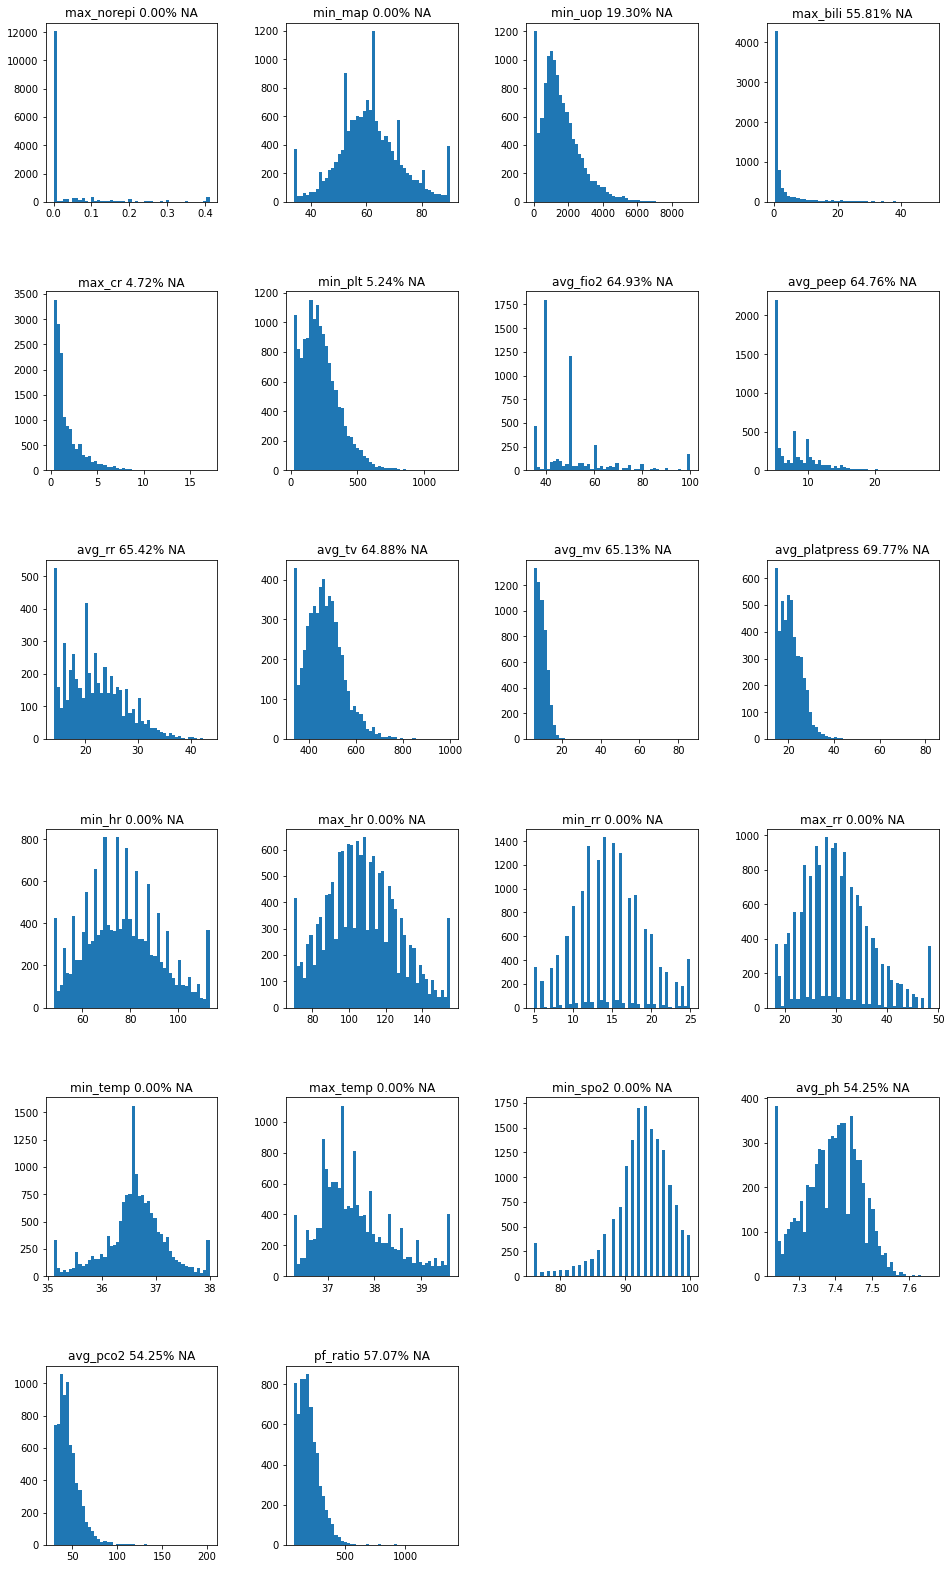

In [53]:
columns = np.array(columns_numbers)
cols = np.pad(columns, (0, 24 - columns.size), constant_values=np.nan).reshape(6, 4)
fig, axes = plt.subplots(
    nrows=cols.shape[0], 
    ncols=cols.shape[1], 
    figsize=(16, 28), 
    gridspec_kw={"wspace": 0.4, "hspace": 0.5}
)
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        column = cols[row, col]
        ax = axes[row, col]
        if isinstance(column, str) and column in winsorized:
            ax.hist(
                winsorized[column], 
                bins=50,
#                 log=True
            )
            ax.set_title(column + f" {winsorized[column].isna().sum() * 100 / winsorized.shape[0]:.2f}% NA")
        else:
            ax.tick_params(
                axis='both', which='both',
                bottom=None, top=None,
                labelbottom=None,
                left=None, right=None,
                labelleft=None
            )
            for i in ["top", "left", "right", "bottom"]:
                ax.spines[i].set_visible(False)

In [ ]:
data.to_csv("MIMIC/data_winsorized3-31-22.csv")